# DATAFRAME

Import of libraries

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2

## 1st dataframe
Using dataframe to store patient ID, class and path to image.

In [3]:
base_path = "data"
folder = os.listdir(base_path)

total_images = 0
#finding the number of total images
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = os.path.join(base_path, patient_id )
        class_path = os.path.join(patient_path, str(c))
        subfiles = os.listdir(class_path)
        total_images += len(subfiles)

#DATAFRAME
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "class"])
k = 0
for n in range(len(folder)):
    patient_id = folder[n]
    patient_path = os.path.join(base_path, patient_id ) 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = os.listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = os.path.join(class_path, image_path)
            data.iloc[k]["class"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1  

data\10253/0/10253_idx5_x1301_y1051_class0.png
patient_id                                             10253
path          data\10253/0/10253_idx5_x1301_y1051_class0.png
class                                                      0
Name: 124, dtype: object
patient_id                                            10254
path          data\10254/0/10254_idx5_x1851_y651_class0.png
class                                                     0
Name: 873, dtype: object


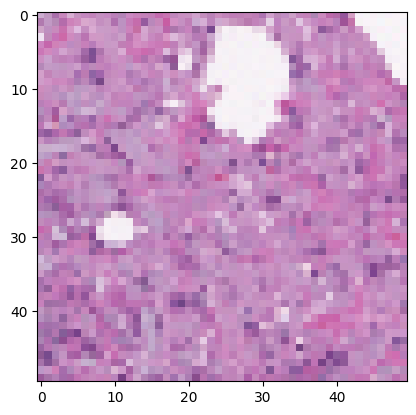

In [4]:
# Just some tests
print(data.loc[124,'path'])
print(data.loc[124])
print(data.loc[873])
plt.imshow(plt.imread(data.loc[124,'path']))

In [5]:
#Creating a dataframe for each patient
for i in folder:
    df = data[data['patient_id'] == i]
    exec(f'data{i} = df')

In [6]:
#using train_test_split for splitting the data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=30)
print('########## Train data ##########')
print(train_data)
print('########## Test data ##########')
print(test_data)

########## Train data ##########
       patient_id                                            path class
167268      15473   data\15473/0/15473_idx5_x1351_y451_class0.png     0
25485       10282    data\10282/0/10282_idx5_x651_y851_class0.png     0
242394       9181    data\9181/0/9181_idx5_x2551_y1101_class0.png     0
139916      13693   data\13693/0/13693_idx5_x2001_y701_class0.png     0
27823       10288   data\10288/0/10288_idx5_x1051_y451_class0.png     0
...           ...                                             ...   ...
3905        10259   data\10259/0/10259_idx5_x2051_y951_class0.png     0
108969      12935  data\12935/1/12935_idx5_x1151_y1751_class1.png     1
222339       9043    data\9043/1/9043_idx5_x2301_y1051_class1.png     1
46220       10305   data\10305/0/10305_idx5_x1951_y801_class0.png     0
48045       10306  data\10306/0/10306_idx5_x2451_y1151_class0.png     0

[194266 rows x 3 columns]
########## Test data ##########
       patient_id                           

## 2nd dataframe

Creating a dataframe that includes 4 features; red, blue, green, gray

In [7]:
dataFeatures = pd.DataFrame(columns = ['red','green','blue','gray'])
imgSize = 50*50

for i in range(10000):
    img = plt.imread(data.loc[i,'path'])
    imgGray = cv2.imread(data.loc[i,'path'],0)
    imgGray = cv2.cvtColor(imgGray, cv2.COLOR_BGR2RGB)
    
    red = sum(sum(img[:,:,0]))/imgSize
    green = sum(sum(img[:,:,1]))/imgSize
    blue = sum(sum(img[:,:,2]))/imgSize
    gray = sum(sum(imgGray[:,:,0]))/imgSize
    
    dataFeatures.loc[data.loc[i,'path']] = [red,green,blue,gray]
    
print(dataFeatures)

                                                     red     green      blue  \
data\10253/0/10253_idx5_x1001_y1001_class0.png  0.827936  0.582193  0.756613   
data\10253/0/10253_idx5_x1001_y1051_class0.png  0.875114  0.723770  0.835029   
data\10253/0/10253_idx5_x1001_y1101_class0.png  0.916524  0.848179  0.903890   
data\10253/0/10253_idx5_x1001_y1151_class0.png  0.913735  0.863232  0.911594   
data\10253/0/10253_idx5_x1001_y1201_class0.png  0.914912  0.823939  0.884461   
...                                                  ...       ...       ...   
data\10268/0/10268_idx5_x1351_y701_class0.png   0.712692  0.445849  0.621881   
data\10268/0/10268_idx5_x1351_y751_class0.png   0.852237  0.624500  0.741175   
data\10268/0/10268_idx5_x1351_y801_class0.png   0.846671  0.584439  0.718173   
data\10268/0/10268_idx5_x1351_y851_class0.png   0.831376  0.481126  0.642731   
data\10268/0/10268_idx5_x1351_y901_class0.png   0.789950  0.461330  0.627860   

                                       

## Example sample, just some
Using 2 samples for experiments

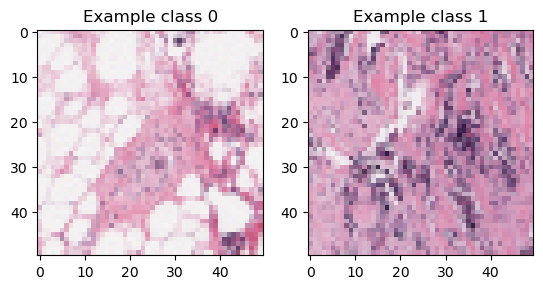

In [18]:
ex0 = data[data['path'] == 'data/8957/0/8957_idx5_x1151_y701_class0.png']
ex1 = data[data['path'] == 'data/8957/1/8957_idx5_x1451_y651_class1.png']

plt.subplot(1, 2, 1)
plt.imshow(plt.imread(ex0.loc[277423, 'path']))
plt.title('Example class 0')

plt.subplot(1, 2, 2)
plt.imshow(plt.imread(ex1.loc[277462, 'path']))
plt.title('Example class 1')

plt.show()

(50, 50, 3)
(50, 50)
(50, 50, 3)


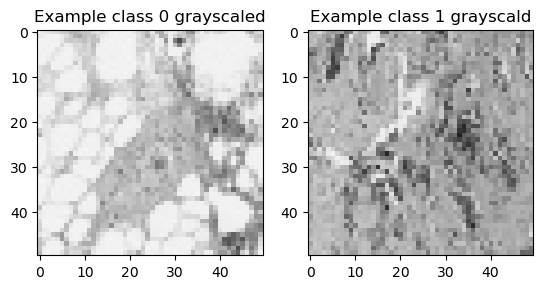

In [21]:
# grayscale
img = cv2.imread('data/8957/0/8957_idx5_x1151_y701_class0.png')
print(img.shape)
img0 = cv2.imread('data/8957/0/8957_idx5_x1151_y701_class0.png',0)
print(img0.shape)
img0g = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
print(img0g.shape)


img1 = cv2.imread('data/8957/1/8957_idx5_x1451_y651_class1.png',0)
img1g = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img0g)
plt.title('Example class 0 grayscaled')
plt.subplot(1, 2, 2)
plt.imshow(img1g)
plt.title('Example class 1 grayscald')
plt.show()

In [87]:
# Finding average value in each image
value0 = 0
for i in range(50):
    for j in range(50):
        value0 += img0g[i,j,0]
value0 = value0 / (50*50)
print(value0)

value1 = 0
for i in range(50):
    for j in range(50):
        value1 += img1g[i,j,0]
value1 = value1 / (50*50)
print(value1)

209.7324
162.5376
